In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt


In [2]:
df = pd.read_csv(r"C:\Users\ravid\OneDrive\KN\Algerian Forest Fire\Algerian_forest_fires_dataset_UPDATE.csv", skiprows=[0])

In [3]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [4]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [5]:
df[df['month'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.loc[df['day'] =='day']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [7]:
df = df.drop(df.index[[122, 123]])

In [8]:
df.reset_index(drop = True, inplace = True)

In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [10]:
df = df.rename(columns={' RH': 'RH',' Ws':'Ws','Rain ':'Rain','Classes  ':'Classes'})

In [11]:
df['DC'].replace('14.6 9','14.69', inplace = True)

In [12]:
df['FWI'] = pd.to_numeric(df['FWI'], errors='coerce')

# Calculate the mean of the non-NaN values
mean_value = df['FWI'].mean(skipna=True)
df['FWI'].fillna(mean_value, inplace = True)
df['Classes'].fillna('fire', inplace = True)

In [13]:
# df['Classes'] = df['Classes'].str.replace(' ', '')
# df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
for col in df.iloc[:,:-1].columns:
    if df[col].dtype == 'object':  # check if column contains strings
        df[col] = df[col].str.strip()
        df[col] = df[col].astype(float)

In [14]:
df['Classes'] = df['Classes'].str.strip()

### Startind EDA

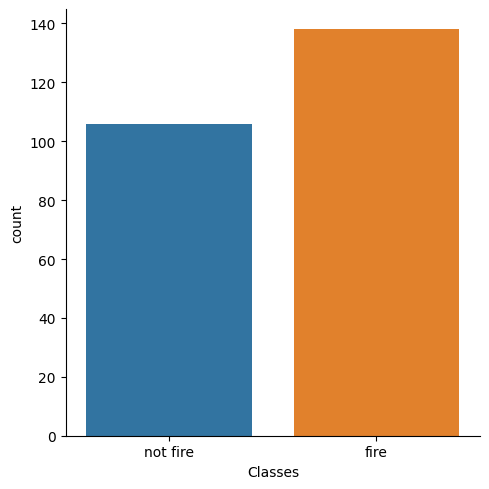

In [15]:
sns.catplot(x="Classes", kind="count", data=df)

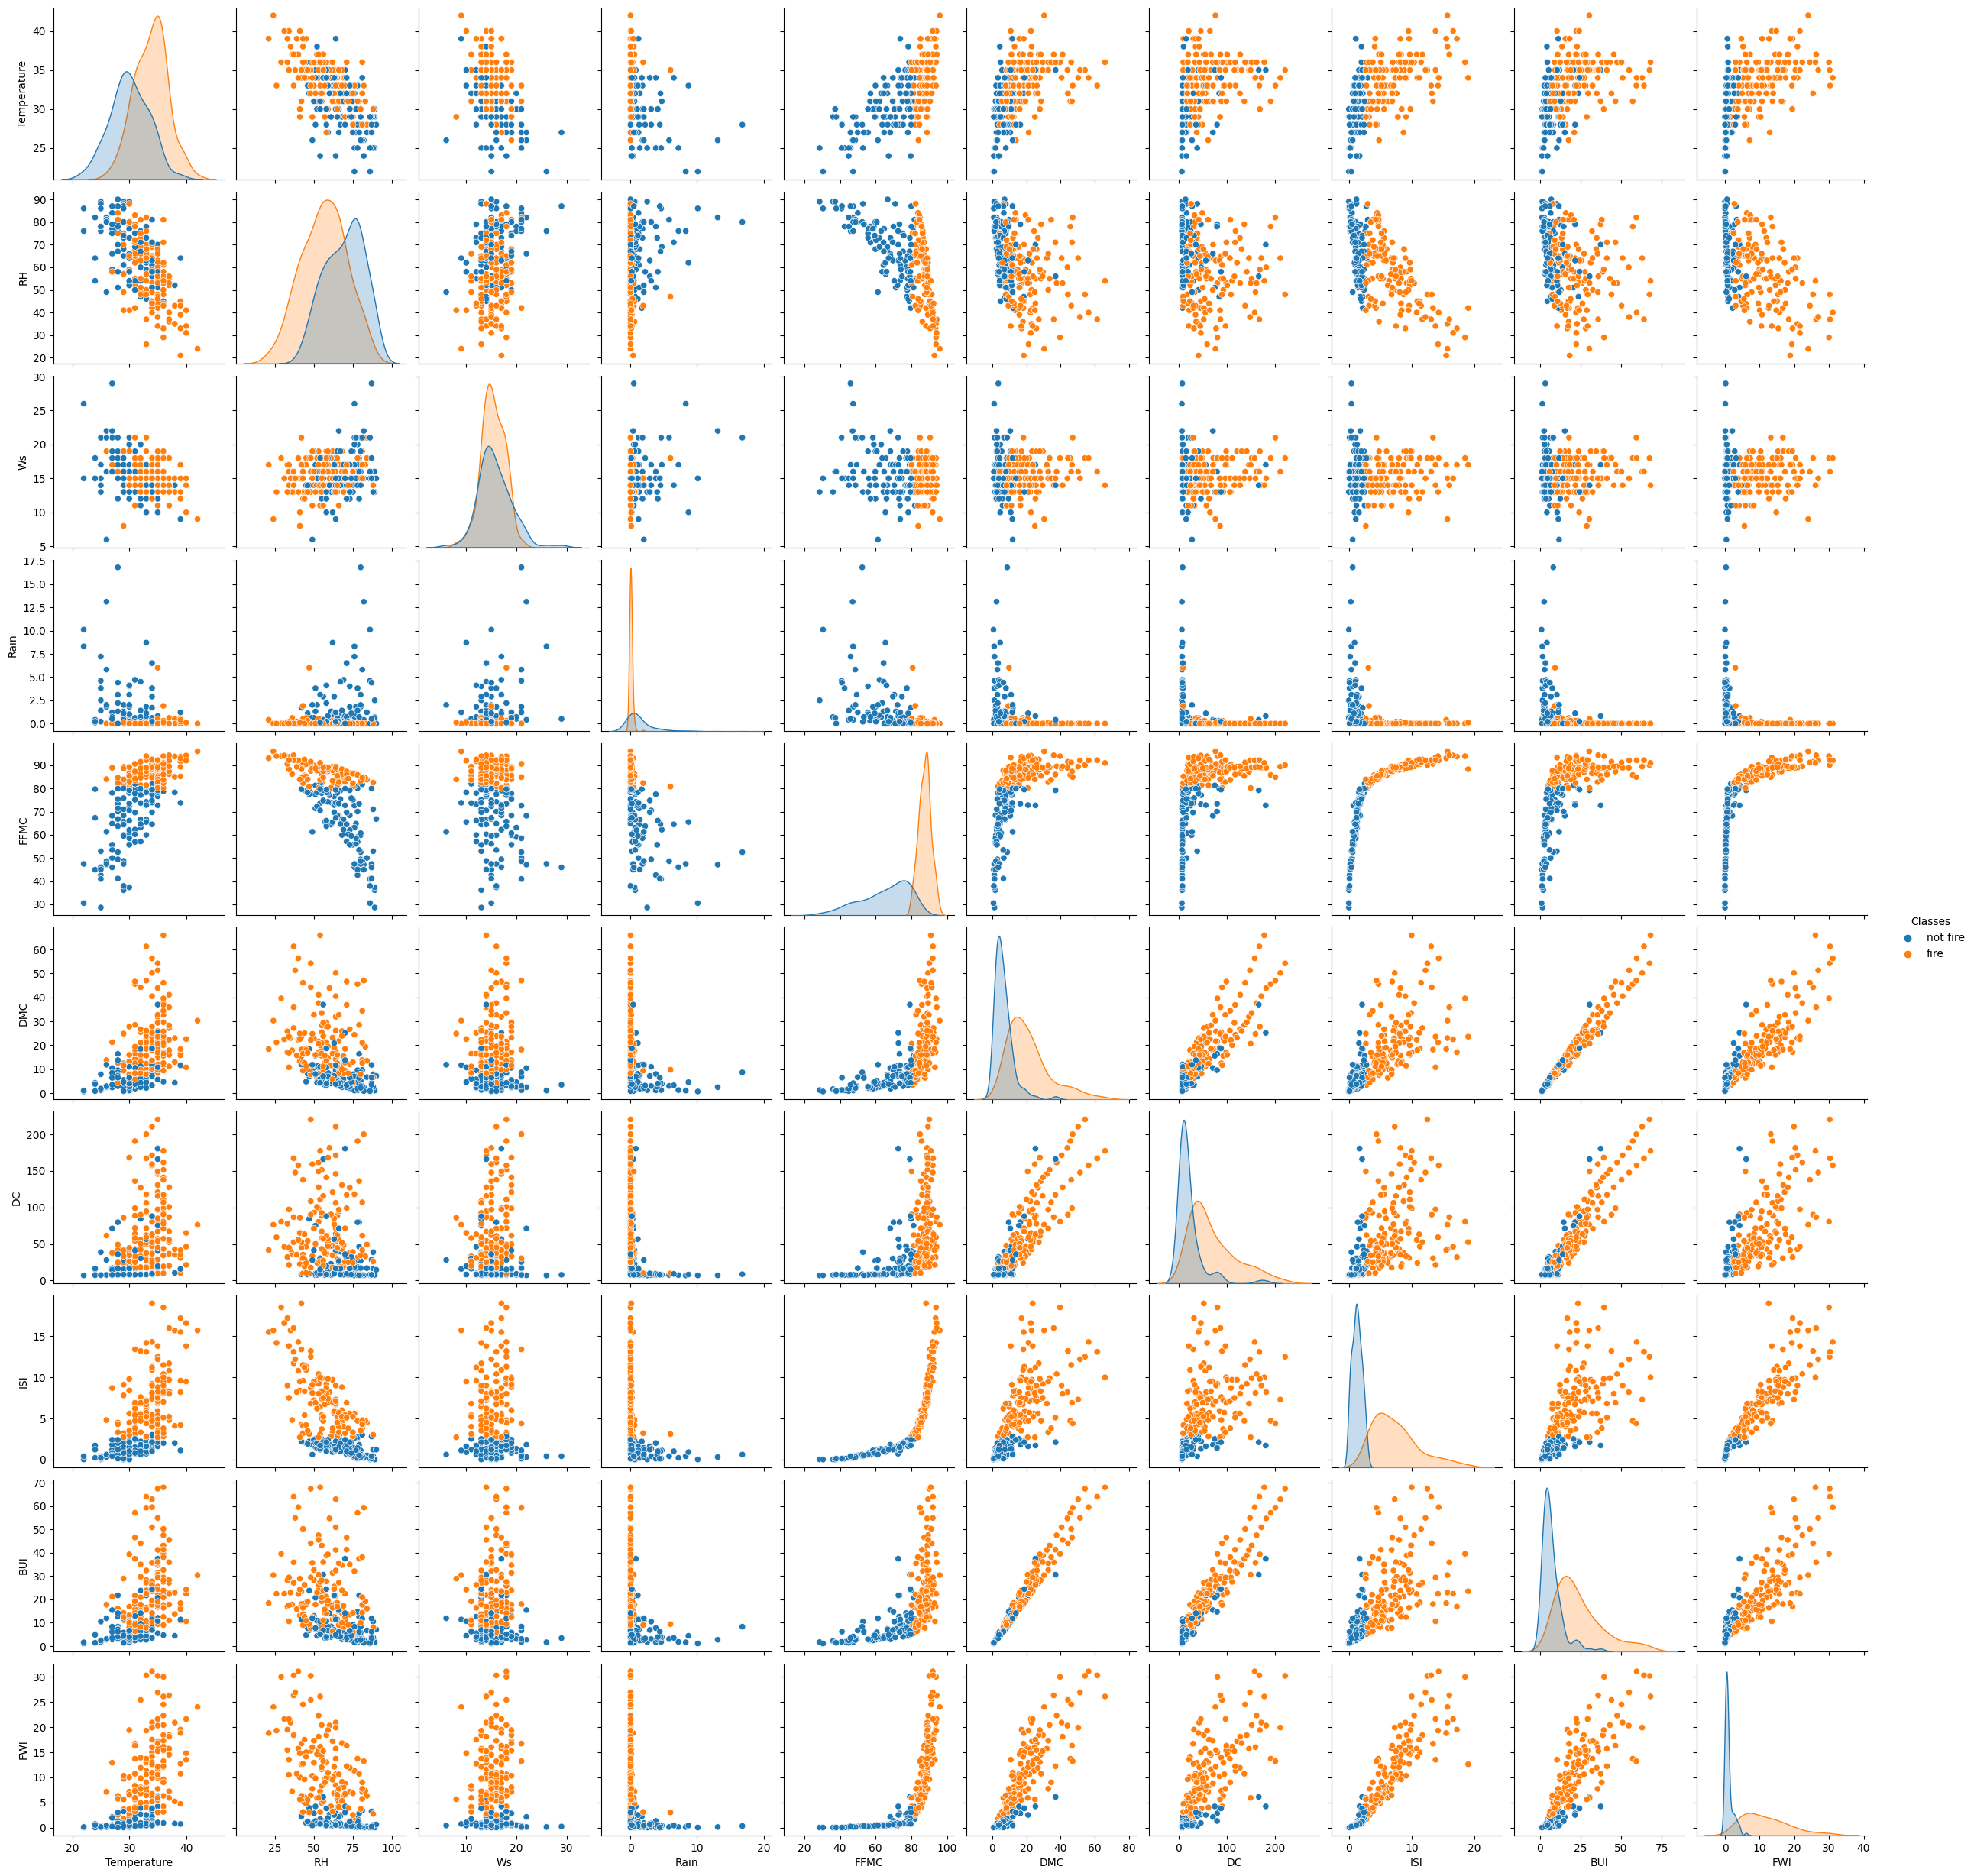

In [15]:
sns.pairplot(data = df.iloc[:,3:],hue = 'Classes')

In [16]:
df.reset_index(drop = True, inplace = True)
df.shape

(244, 14)

In [17]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.035391
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.425242
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.450000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [18]:
from ydata_profiling import ProfileReport

In [19]:
profile = ProfileReport(df, title="Profiling Report")

In [20]:
profile.to_file("Algerian_fire.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### there is Multicollienarity removing it by VIF

In [21]:

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
data = df.iloc[:,3:13]
threshold = 5
def drop_high_vif_variables(data, threshold):
    """
    Drops variables with VIF greater than threshold until all variables have VIF less than threshold.

    Parameters:
    data (pandas.DataFrame): The dataset to check for multicollinearity.
    threshold (float): The VIF threshold above which a variable is considered to have high multicollinearity.

    Returns:
    pandas.DataFrame: The dataset with the high VIF variables dropped.
    """
    # Create a list to keep track of dropped variables
    dropped_variables = []

    # Loop through the predictor variables and drop variables with high VIF until all variables have VIF less than threshold
    for i in range(len(data.columns)-1):
        # Get the remaining variables that have not been dropped
        remaining_variables = data.drop(dropped_variables, axis=1)

        # Calculate the VIF for the remaining variables
        vif = pd.DataFrame()
        vif['VIF Factor'] = [variance_inflation_factor(remaining_variables.values, j) for j in range(remaining_variables.shape[1])]
        vif['predictor_variables'] = remaining_variables.columns

        # Check if any variables have VIF greater than the threshold
        high_vif_variables = vif[vif['VIF Factor'] > threshold]

        if high_vif_variables.empty:
            # If no variables have high VIF, stop the loop
            break
        else:
            # Drop the variable with the highest VIF and add it to the dropped_variables list
            variable_to_drop = high_vif_variables.loc[high_vif_variables['VIF Factor'].idxmax(), 'predictor_variables']
            dropped_variables.append(variable_to_drop)
            print(f"Dropped variable {variable_to_drop} with VIF={high_vif_variables['VIF Factor'].max()}")

    # Drop the dropped_variables from the original data
    data_vif_dropped = data.drop(dropped_variables, axis=1)

    return data_vif_dropped

In [22]:
df_VIF = drop_high_vif_variables(data, threshold)

Dropped variable BUI with VIF=402.8842280372699
Dropped variable FFMC with VIF=99.97779145341542
Dropped variable FWI with VIF=57.207677881441775
Dropped variable Ws with VIF=34.202953072474514
Dropped variable Temperature with VIF=29.885720208533943
Dropped variable DMC with VIF=15.316064101666814


In [23]:
df_VIF['Classes'] = df.iloc[:,-1]

In [24]:
df_VIF.isnull().sum()

RH         0
Rain       0
DC         0
ISI        0
Classes    0
dtype: int64

In [25]:
df_VIF.describe()

,RH,Rain,DC,ISI
count,244.000000,244.000000,244.000000,244.000000
mean,61.938525,0.760656,49.288484,4.774180
std,14.884200,1.999406,47.619393,4.175318
min,21.000000,0.000000,6.900000,0.000000
25%,52.000000,0.000000,13.275000,1.400000
50%,63.000000,0.000000,33.100000,3.500000
75%,73.250000,0.500000,68.150000,7.300000
max,90.000000,16.800000,220.400000,19.000000


### Scaling the data to same scale 

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
df.iloc[:,3:14].columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes'],
      dtype='object')

In [122]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:,3:13])
scaled_df = pd.DataFrame(scaled_data, columns=df.iloc[:,3:13].columns)

In [123]:
scaled_df['Classes'] = df.iloc[:,-1]

In [124]:
scaled_df['Classes'] = scaled_df['Classes'].replace({'fire' :1, 'not fire': 0})

### Building Random Forest

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [67]:
X = scaled_df.iloc[:,:-1]
y = scaled_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
param_grid = {
    'n_estimators': [40,],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [69]:
# Create a Random Forest classifier object
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [70]:
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 40}
Best score:  0.9764705882352942


In [71]:
y_pred = grid_search.predict(X_test)

In [72]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [74]:
# create confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# print confusion matrix
print("Confusion matrix:")
print(confusion)

# calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Confusion matrix:
[[27  0]
 [ 1 46]]
Accuracy: 0.9864864864864865
Precision: 1.0
Recall: 0.9787234042553191
F1-score: 0.989247311827957


In [113]:
test = df.iloc[4,:]
test

day                 5.0
month               6.0
year             2012.0
Temperature        27.0
RH                 77.0
Ws                 16.0
Rain                0.0
FFMC               64.8
DMC                 3.0
DC                 14.2
ISI                 1.2
BUI                 3.9
FWI                 0.5
Classes        not fire
Name: 4, dtype: object

In [89]:
import pickle
pickle.dump(grid_search,open('model.pkl','wb'))

In [90]:
pickle_model = pickle.load(open('model.pkl', 'rb'))

In [78]:
str(np.where(pickle_model.predict(x)[0] == 0, 'not fire', 'fire'))

C:\Users\ravid\Anaconda3\envs\Myenv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


'not fire'

In [125]:
pickle.dump(scaler,open('scaler.pkl','wb'))
scaler_model = pickle.load(open('scaler.pkl', 'rb'))

In [136]:
data = {
    'Temperature': 10, 'RH':12
    , 'Ws': 14, 'Rain': 16
    , 'FFMC':9, 'DMC':8,
    'DC':11, 'ISI':13,
    'BUI':15,'FWI':17
       }

In [137]:
new_data = [list(data.values())]

In [132]:
x = scaler_model.transform([list(data.values())])

C:\Users\ravid\Anaconda3\envs\Myenv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [139]:
pickle_model.predict(new_data)[0]

C:\Users\ravid\Anaconda3\envs\Myenv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


1